In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


this is the overall dataset having 14 features and income is the target variable.The predication will be for more than or
less than 50k

In [3]:
df.shape

(32560, 15)

we have total 32560 rows and 15 columns

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


data does not have any null values.

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

I can see here the target variable income data is imbalnced. to train a better model it should be balanced.

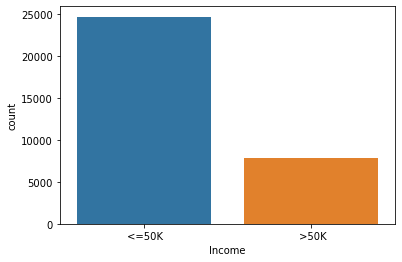

In [9]:
sns.countplot(df['Income']);

In [10]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
*********************************************************
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th     

here I can see the count for each data column.In columns- workclass,occupation,native_country,category names are missing. some columns in data have descrete ,continuous variable.

# visualisation:

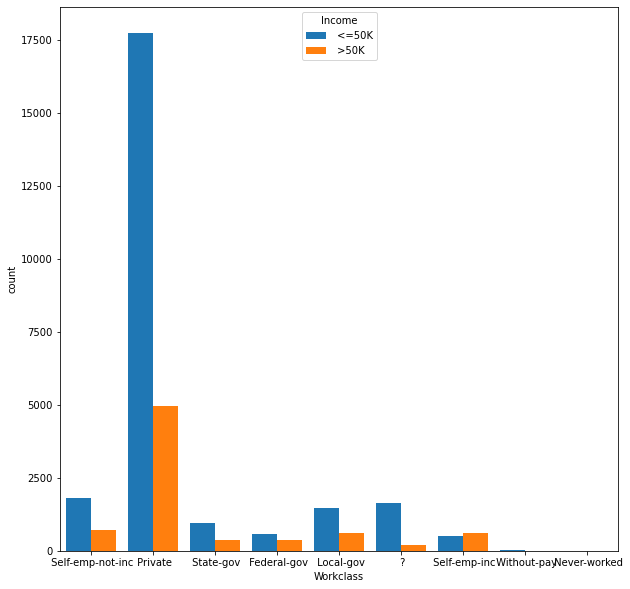

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'], hue=df['Income'],saturation=1,)
plt.show()

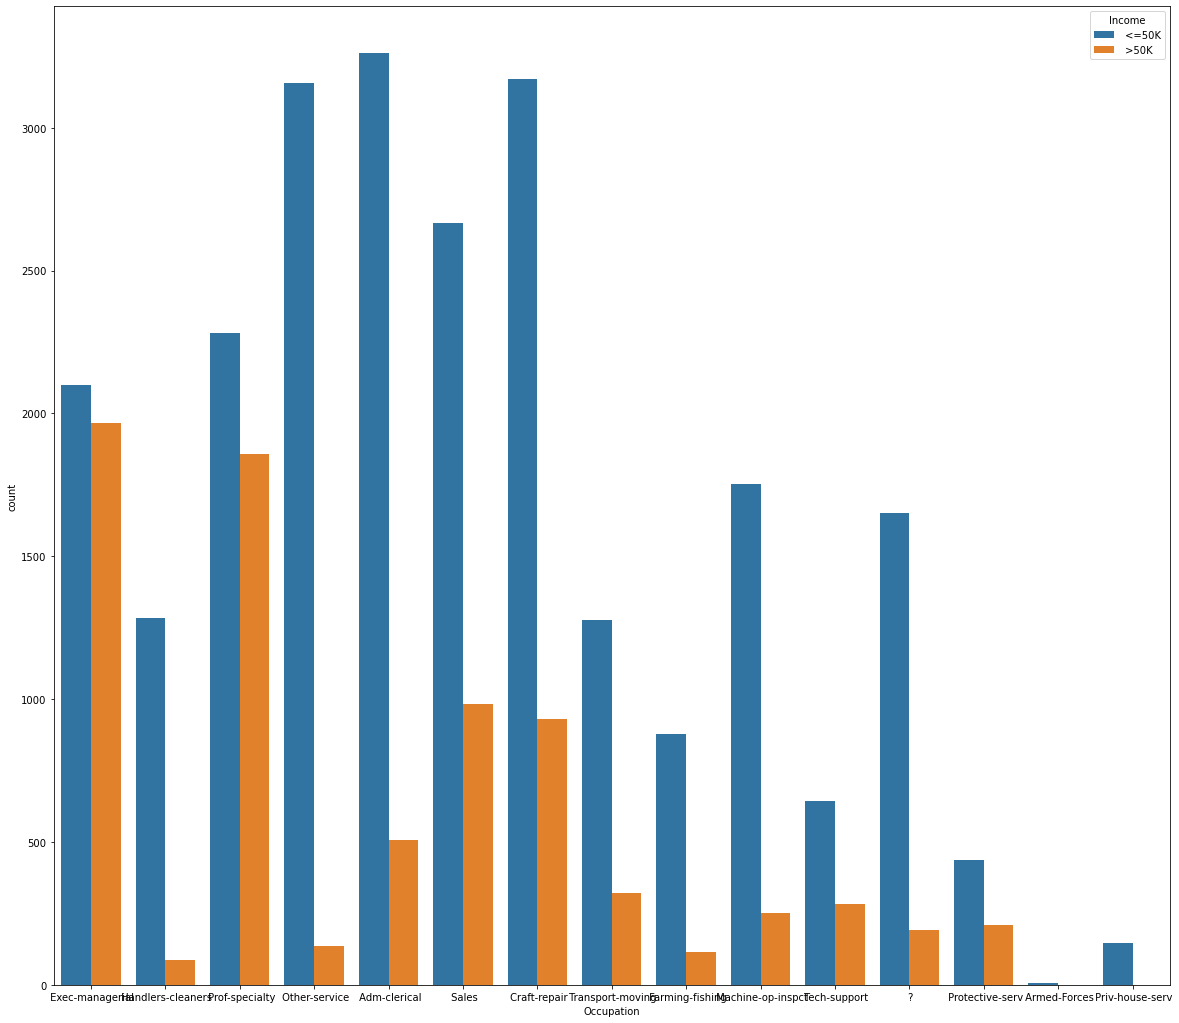

In [12]:
plt.figure(figsize=(20,18))
sns.countplot(df['Occupation'], hue=df['Income'])
plt.show()

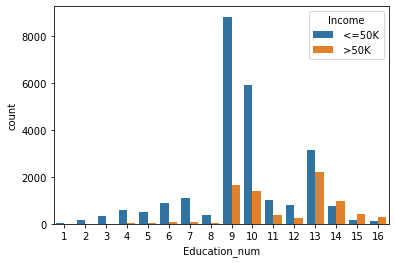

In [13]:
sns.countplot(df['Education_num'], hue=df['Income'])
plt.show()

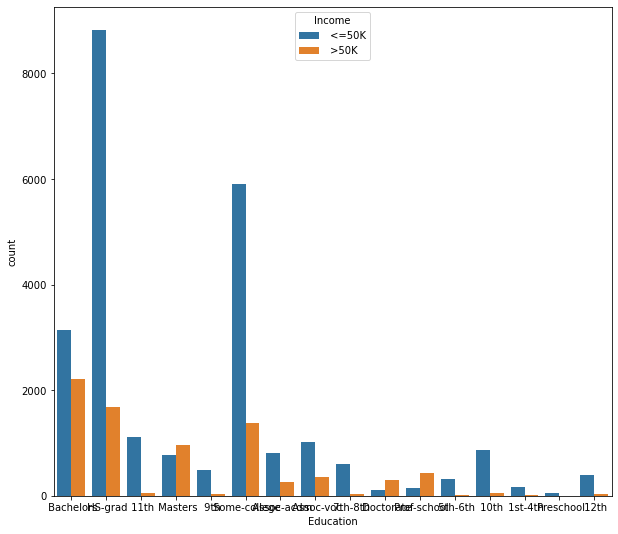

In [14]:
plt.figure(figsize=(10,9))
sns.countplot(df['Education'], hue=df['Income'])
plt.show()

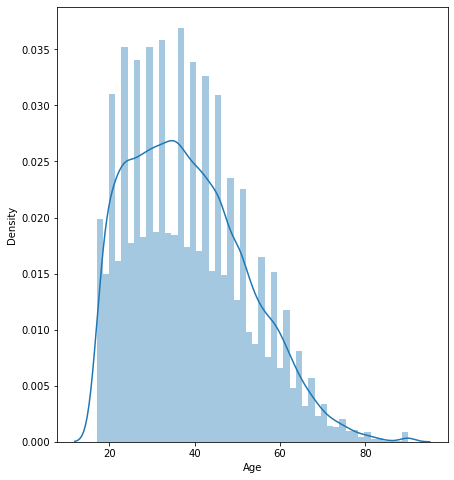

In [15]:
plt.figure(figsize=(7,8))
sns.distplot(df['Age'],hist=True)
plt.show()

here I have plotted various graphs to show the distribution of income over other features.bachloers and graduates earn more than 50k as compared to school and college.private sectors employee earn mre than government employees.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [22]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


Here I have converted all object data into numerical using labelecnoder

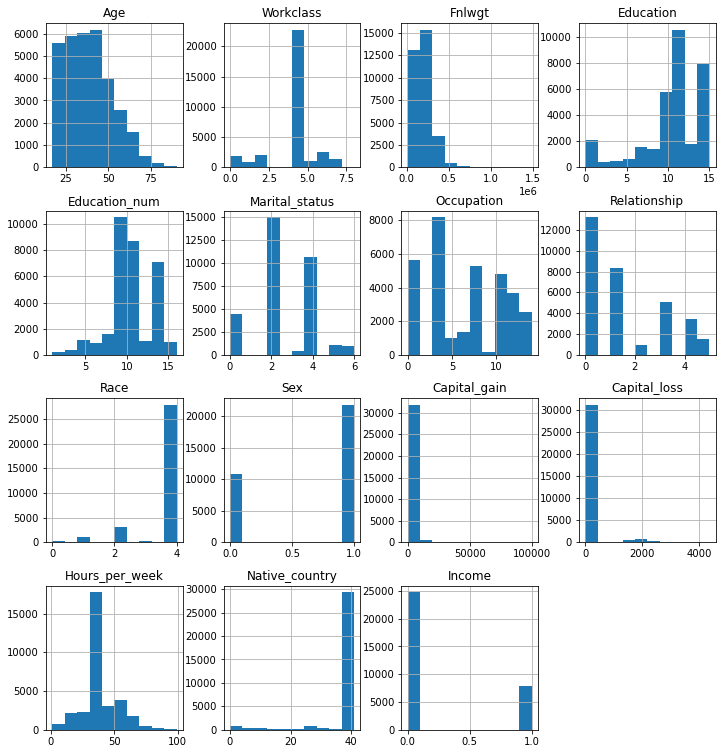

In [23]:
df.hist(figsize = (12,13));

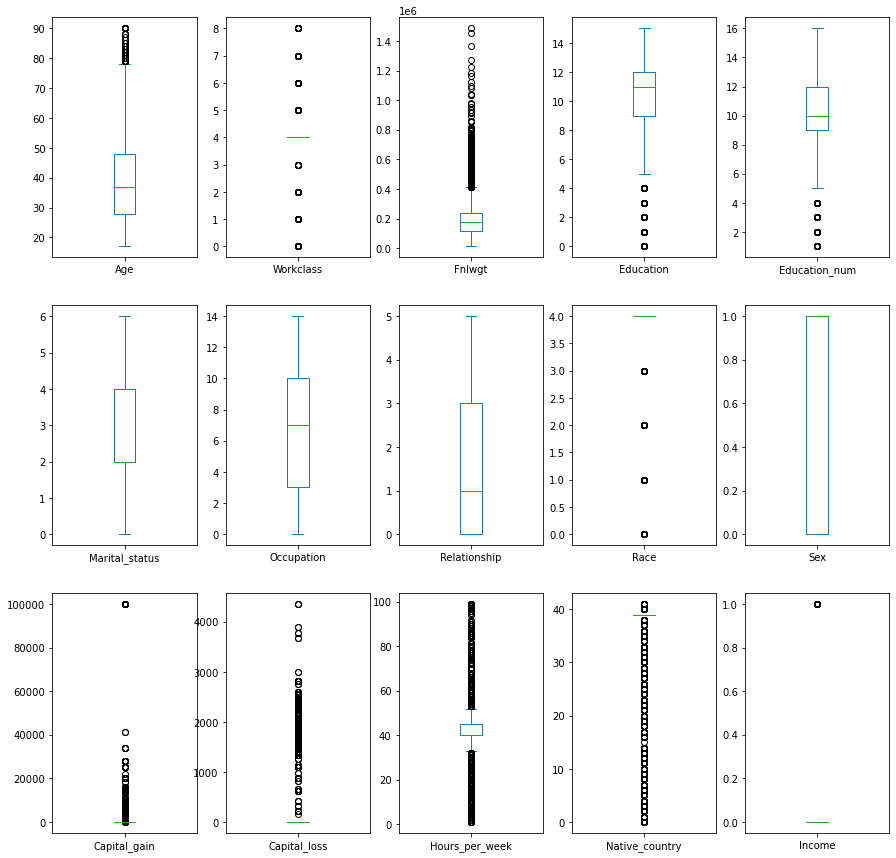

In [24]:
df.plot(kind='box',figsize=(15,15),layout=(3,5),sharex=False,subplots=True);

In [25]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


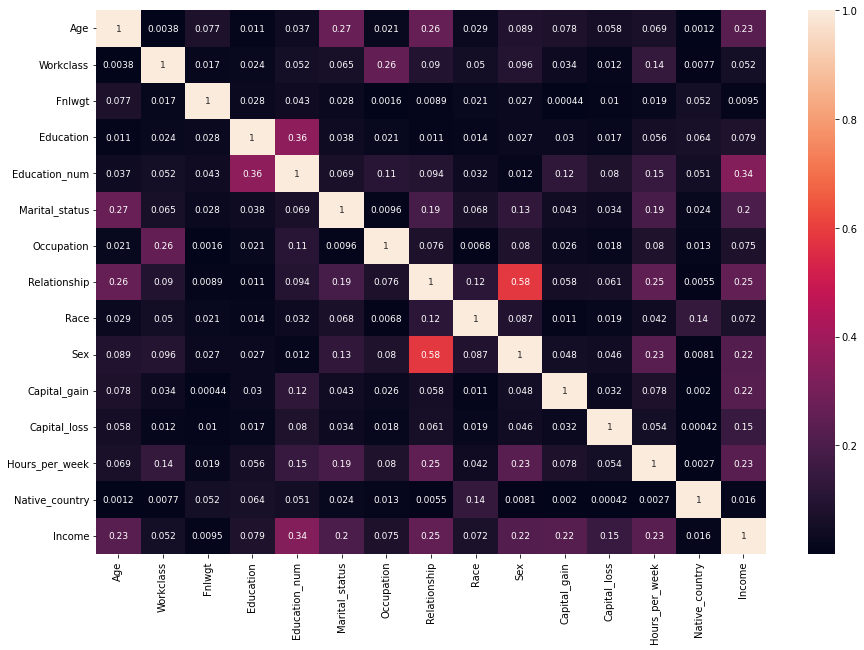

In [26]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

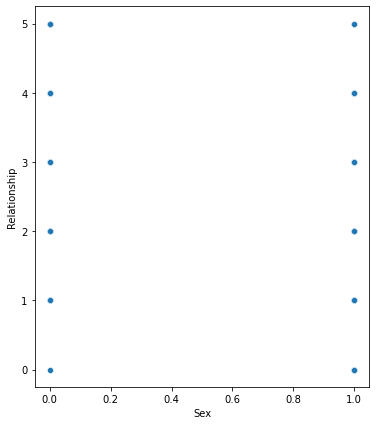

In [27]:
plt.figure(figsize=(6,7))
sns.scatterplot(x= 'Sex',y = 'Relationship',data=df)
plt.show()

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week and sex. but sex and relationship features are corelated with each others
I will drop column sex beacause its less correlated than Relationship with income.

In [28]:
df.drop(columns=['Sex'],axis=1,inplace= True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,0,0,20,39,0


# SKEWNESS

In [29]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

here we can see the skewness for columns age and fnlwgt as others having categorical data. 

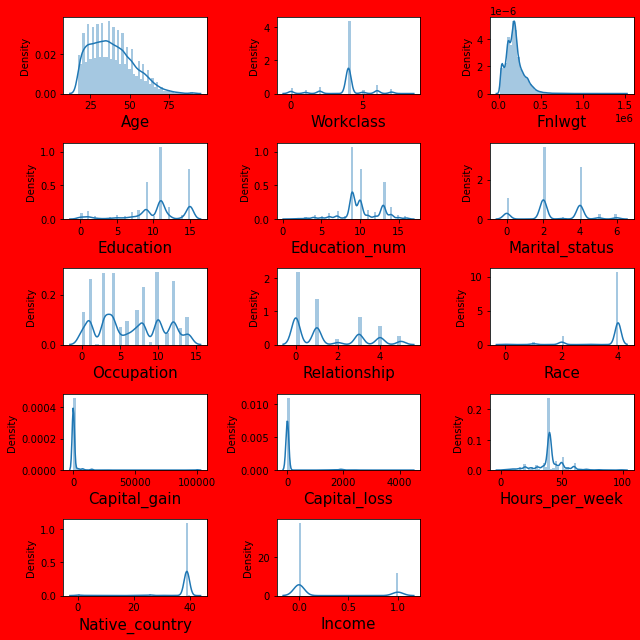

In [30]:
plt.figure(figsize =(9,9),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =15)

    plotnumber+=1
plt.tight_layout()


In [31]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [32]:
df['Age'] = np.log(df['Age'])
df['Fnlwgt'] = np.log(df['Fnlwgt'])
df['Hours_per_week'] = np.log(df['Hours_per_week'])

In [33]:
df.skew()

Age               -0.131709
Workclass         -0.752280
Fnlwgt            -0.842578
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week    -2.652576
Native_country    -3.658235
Income             1.212383
dtype: float64

here we I can see for age and fnlwgt i have removed skewness.

# Outliers Remove

In our data most of the features contain categorical data. so I will have to remove outliers for those features which has continuos data.The columns which I have to deal to remove outliers are - capital gain and capital loss.

In [34]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

In [35]:
capital_gain_high = (q3.Capital_gain + (1.5 *iqr.Capital_gain))
capital_gain_high

outliers = np.where(df['Capital_gain'] > capital_gain_high)
df = df.drop(df.index[outliers])
print(df.shape)
df.reset_index()

(29849, 14)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,3.912023,6,11.330336,9,13,2,4,0,4,0,0,2.564949,39,0
1,1,3.637586,4,12.281393,11,9,0,6,1,4,0,0,3.688879,39,0
2,2,3.970292,4,12.366153,1,7,2,6,0,2,0,0,3.688879,39,0
3,3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,3.688879,5,0
4,4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,3.688879,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29844,32554,3.091042,4,12.644818,15,10,4,11,1,4,0,0,3.688879,39,0
29845,32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,3.637586,39,0
29846,32556,3.688879,4,11.947134,11,9,2,7,0,4,0,0,3.688879,39,1
29847,32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,3.688879,39,0


In [36]:
capital_loss_high = (q3.Capital_loss + (1.5 *iqr.Capital_loss))
capital_loss_high

outliers2 = np.where(df['Capital_loss'] > capital_loss_high)
df = df.drop(df.index[outliers2])
print(df.shape)
df.reset_index()

(28330, 14)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,3.912023,6,11.330336,9,13,2,4,0,4,0,0,2.564949,39,0
1,1,3.637586,4,12.281393,11,9,0,6,1,4,0,0,3.688879,39,0
2,2,3.970292,4,12.366153,1,7,2,6,0,2,0,0,3.688879,39,0
3,3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,3.688879,5,0
4,4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,3.688879,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28325,32554,3.091042,4,12.644818,15,10,4,11,1,4,0,0,3.688879,39,0
28326,32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,3.637586,39,0
28327,32556,3.688879,4,11.947134,11,9,2,7,0,4,0,0,3.688879,39,1
28328,32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,3.688879,39,0


so here i have removed outliers for those three columns.

In [37]:
X = df.drop('Income', axis=1)
y= df['Income']
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,3.912023,6,11.330336,9,13,2,4,0,4,0,0,2.564949,39
1,3.637586,4,12.281393,11,9,0,6,1,4,0,0,3.688879,39
2,3.970292,4,12.366153,1,7,2,6,0,2,0,0,3.688879,39
3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,3.688879,5
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,3.688879,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3.091042,4,12.644818,15,10,4,11,1,4,0,0,3.688879,39
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,3.637586,39
32556,3.688879,4,11.947134,11,9,2,7,0,4,0,0,3.688879,39
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,3.688879,39


# FEATURE SELECTION:-

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(n_estimators=15,criterion ='entropy')

In [39]:
ext.fit(X,y)

ExtraTreesClassifier(criterion='entropy', n_estimators=15)

In [40]:
features_imp = ext.feature_importances_

In [41]:
for index,val in enumerate(features_imp):
    print(index,val)

0 0.1967047680165237
1 0.050467485156715376
2 0.2004593076753672
3 0.038110130027663794
4 0.07751787850722552
5 0.07130471247407054
6 0.09121307022673066
7 0.12131554076027004
8 0.017755203097332393
9 0.0
10 0.0
11 0.11308779425912313
12 0.022064109798977615


In [42]:
X.columns[[9,10]]

Index(['Capital_gain', 'Capital_loss'], dtype='object')

According extratreeclassifier here is the list of most importan features, So I will not use features which have 0 score which are capital_gain and capital_loss

In [43]:
X.drop(columns= ['Capital_gain', 'Capital_loss'],axis=1,inplace=True)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Native_country
0,3.912023,6,11.330336,9,13,2,4,0,4,2.564949,39
1,3.637586,4,12.281393,11,9,0,6,1,4,3.688879,39
2,3.970292,4,12.366153,1,7,2,6,0,2,3.688879,39
3,3.332205,4,12.732011,9,13,2,10,5,2,3.688879,5
4,3.610918,4,12.558777,12,14,2,4,5,4,3.688879,39
...,...,...,...,...,...,...,...,...,...,...,...
32554,3.091042,4,12.644818,15,10,4,11,1,4,3.688879,39
32555,3.295837,4,12.458006,7,12,2,13,5,4,3.637586,39
32556,3.688879,4,11.947134,11,9,2,7,0,4,3.688879,39
32557,4.060443,4,11.931044,11,9,6,1,4,4,3.688879,39


# SCALING

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
SMOTE()

SMOTE()

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [48]:
from collections import Counter
ove_smp = SMOTE(0.70)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({0: 17225, 1: 4022})
the number of the classes after fit Counter({0: 17225, 1: 12057})


I have applied here smote method to balance the counts in target variable.

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.832333215672432 random_state 0
accuracy 0.832333215672432 random_state 0
accuracy 0.8261560183551006 random_state 1
accuracy 0.8305683021531945 random_state 2
accuracy 0.8348040945993647 random_state 3
accuracy 0.8348040945993647 random_state 3
accuracy 0.8296858453935757 random_state 4
accuracy 0.8277444405224144 random_state 5
accuracy 0.8360395340628309 random_state 6
accuracy 0.8360395340628309 random_state 6
accuracy 0.8261560183551006 random_state 7
accuracy 0.8286268972820332 random_state 8
accuracy 0.8231556653723967 random_state 9
accuracy 0.8282739145781857 random_state 10
accuracy 0.8340981291916696 random_state 11
accuracy 0.8280974232262619 random_state 12
accuracy 0.8275679491704906 random_state 13
accuracy 0.8355100600070596 random_state 14
accuracy 0.837451464878221 random_state 15
accuracy 0.837451464878221 random_state 15
accuracy 0.8284504059301094 random_state 16
accuracy 0.832333215672432 random_state 17
accuracy 0.8224496999647017 random_state 18
accura

In [51]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8393928697493823 Random State 56


In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.794740557712672
[[3952  625]
 [ 538  551]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4577
           1       0.47      0.51      0.49      1089

    accuracy                           0.79      5666
   macro avg       0.67      0.68      0.68      5666
weighted avg       0.80      0.79      0.80      5666



In [53]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.847511471937875
[[4261  316]
 [ 548  541]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4577
           1       0.63      0.50      0.56      1089

    accuracy                           0.85      5666
   macro avg       0.76      0.71      0.73      5666
weighted avg       0.84      0.85      0.84      5666



In [54]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.8487469114013413
[[4375  202]
 [ 655  434]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4577
           1       0.68      0.40      0.50      1089

    accuracy                           0.85      5666
   macro avg       0.78      0.68      0.71      5666
weighted avg       0.83      0.85      0.83      5666



In [55]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.8558065654782916
[[4326  251]
 [ 566  523]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4577
           1       0.68      0.48      0.56      1089

    accuracy                           0.86      5666
   macro avg       0.78      0.71      0.74      5666
weighted avg       0.84      0.86      0.85      5666



In [56]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8333921637839746
[[4260  317]
 [ 627  462]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4577
           1       0.59      0.42      0.49      1089

    accuracy                           0.83      5666
   macro avg       0.73      0.68      0.70      5666
weighted avg       0.82      0.83      0.82      5666



In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.8296858453935757
[[4167  410]
 [ 555  534]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4577
           1       0.57      0.49      0.53      1089

    accuracy                           0.83      5666
   macro avg       0.72      0.70      0.71      5666
weighted avg       0.82      0.83      0.82      5666



In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.8296858453935757
[[4167  410]
 [ 555  534]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4577
           1       0.57      0.49      0.53      1089

    accuracy                           0.83      5666
   macro avg       0.72      0.70      0.71      5666
weighted avg       0.82      0.83      0.82      5666



Here I have trained the model using various methods and SVC and Adaboost are giving me the highest accuracy score which is 86%

# CROSS VALIDATION

In [73]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=3)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.8292622869042128


In [80]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt,X_scaled,y,cv=3)
print("Cross Validation Score for Decision Tree Classifier is:-",scr.mean())

Cross Validation Score for Decision Tree Classifier is:- 0.7996117845603982


In [81]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_scaled,y,cv=3)
print("Cross Validation Score for Random Forest Classifier Model is:-",scr.mean())

Cross Validation Score for Random Forest Classifier Model is:- 0.8470526264357735


In [82]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(at,X_scaled,y,cv=3)
print("Cross Validation Score for AdaboostClassifier Model is:-",scr.mean())

Cross Validation Score for AdaboostClassifier Model is:- 0.8548889321872369


In [83]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(bt,X_scaled,y,cv=3)
print("Cross Validation Score for Bagging Classifier Model is:-",scr.mean())

Cross Validation Score for Bagging Classifier Model is:- 0.8338157675329642


In [84]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgb,X_scaled,y,cv=3)
print("Cross Validation Score for XGB Model is:-",scr.mean())

Cross Validation Score for XGB Model is:- 0.8503707323860236


In [85]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn,X_scaled,y,cv=3)
print("Cross Validation Score for knn Classifier Model is:-",scr.mean())

Cross Validation Score for knn Classifier Model is:- 0.836674979770058


In [86]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X_scaled,y,cv=3)
print("Cross Validation Score for SVC Model is:-",scr.mean())

Cross Validation Score for SVC Model is:- 0.8472997118372346


From above cross validation scores I can see the AdaboostClassifier,SVC,RandomForestClassifier are giving high acuracy and same cross validation score likes model I will use these models to apply hyperparameter tuning.

# HyperPatameter Tuning for AdabooostClassifier

In [87]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,11,12,14,15],'learning_rate':[2.1,0.2,0.10,1.0],'algorithm' : ['SAMME', 'SAMME.R'],
             'random_state':[0,1,2,3,4,5,6]}


In [88]:
GCV = GridSearchCV(AdaBoostClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 15,
 'random_state': 0}

In [89]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [90]:
GCV.best_estimator_

AdaBoostClassifier(n_estimators=15, random_state=0)

In [91]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8505118249205789

<function matplotlib.pyplot.show(close=None, block=None)>

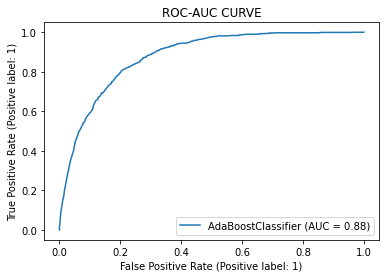

In [92]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

here its giving True Positive rate 89%. so this woul be our best model.

# HyperPatameter Tuning for RandomForest:-

In [101]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[20,30,40,50,60,80],'max_features': ["sqrt", "log2"],'criterion':['gini', "entropy", "log_loss"],
              'max_depth':[20,50,60,90],'min_samples_split':[1,0.2,0.1,3,0.3]}


In [102]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 60}

In [103]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [104]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_split=3, n_estimators=60)

In [105]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8512177903282739

<function matplotlib.pyplot.show(close=None, block=None)>

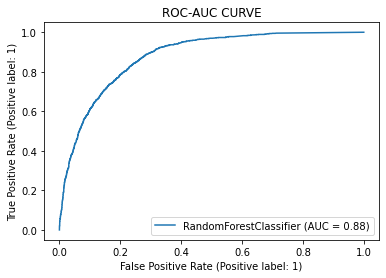

In [106]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

for this model I am finalising Adaboost as final model as accuracy score,score after hyperparameter tuning and cross validation
score is almost same so,this would be the best fit model for this dataset.

In [107]:
filename = 'CensuFinalModel.pickle'
pickle.dump(at,open(filename,'wb'))

model = pickle.load(open(filename,'rb'))

